# Projeto DIVINO
## Avaliação dos Dados

In [32]:
import pandas as pd
from ipynb.fs.full.data_analiser import *

data = pd.read_csv('../../Data/Processed/wine/bigTableWines.csv')

dadosNumericos = data.copy()
dadosNumericos.drop(['Tipo Vinho'], axis=1, inplace=True)
variavelAlvo = 'quality'

### Verificação de dados faltantes

In [33]:
print('Verificação de dados faltantes')
describe(data)

Verificação de dados faltantes
Total de linhas: 6497


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,2042.54,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1436.93,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,0.00,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,812.00,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,1649.00,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,3273.00,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,4897.00,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


In [34]:
quantificarDadosFaltantes(data)

Unnamed: 0              0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Tipo Vinho              0.0
dtype: float64

#### Análise:
O count das variáveis é igual ao total de linhas, o que indica não haver dados faltantes. Isso é evidenciado pela equação abaixo que quantifica dados faltantes por variável:

### Faixa Dinâmica de Cada Variável:

In [35]:
exibirFaixaDinamicaDasVariaveis(dadosNumericos)

,Min,Max,Range
Unnamed: 0,0.00,4897.00,4897.00
fixed acidity,3.80,15.90,12.10
volatile acidity,0.08,1.58,1.50
citric acid,0.00,1.66,1.66
residual sugar,0.60,65.80,65.20
chlorides,0.01,0.61,0.60
free sulfur dioxide,1.00,289.00,288.00
total sulfur dioxide,6.00,440.00,434.00
density,0.99,1.04,0.05
pH,2.72,4.01,1.29


#### Análise:
Observa-se que as variáveis "Unnamed: 0", "free sulfur dioxide" e "total sulfur dioxide" tem as maiores faixas, sendo a primeira o caso mais preocupante. Ao longo da análise vamos observar se trata-se de efeito de outlier ou tem a ver com a própria distribuição dos dados, quando podemos decidir por aplicar um log, por exemplo. 

### Histograma e KDE

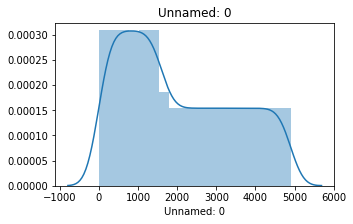

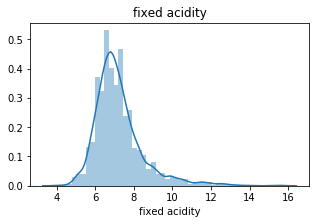

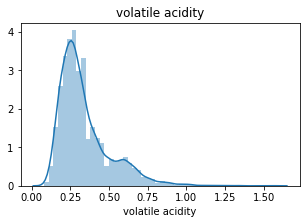

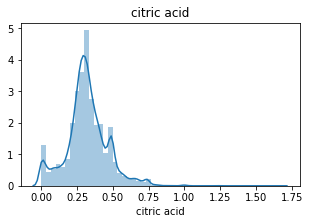

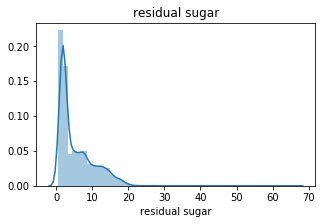

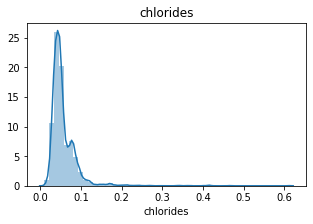

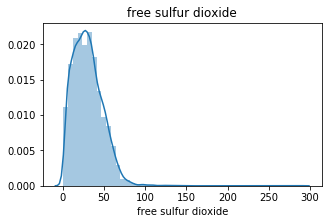

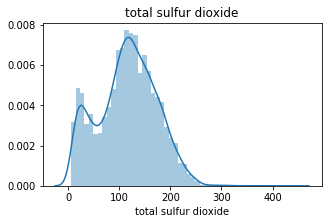

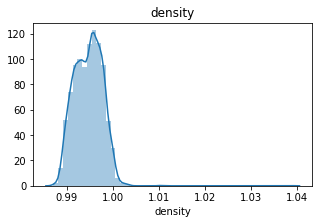

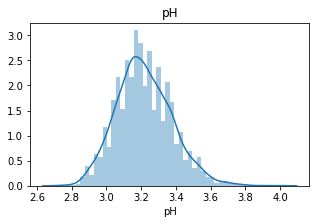

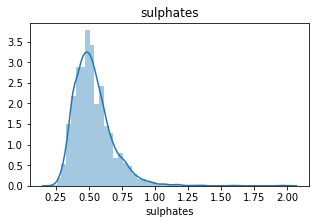

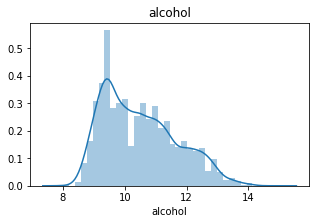

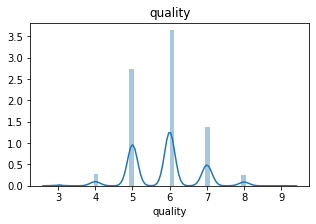

In [36]:
exibirHistogramaComKdeParaCadaVariavel(dadosNumericos)

### Análise:
O KDE e o histograma mostraramque a variável "Unnamed: 0" possui uma distribuição bastante espalhada ao longo de toda a faixa dinâmica, porém algumas variáveis com faixa dinâmica pequena possuem uma calda longa, tais como "citric acid", "residual sugar" e "chlorides".

### Histogramas e KDE para diferentes grupos.

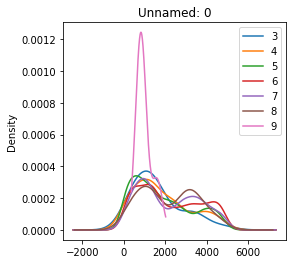

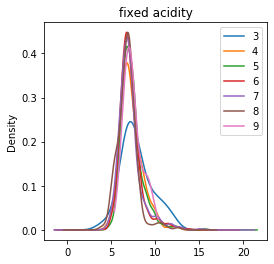

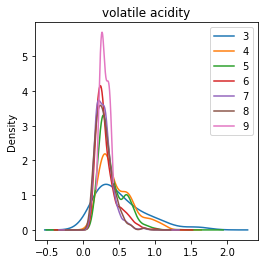

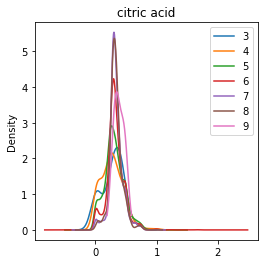

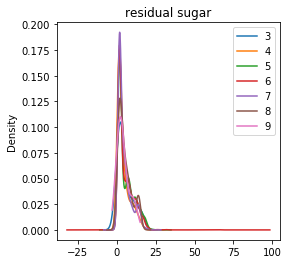

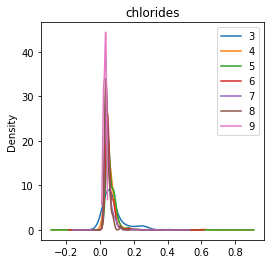

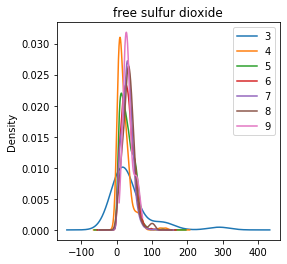

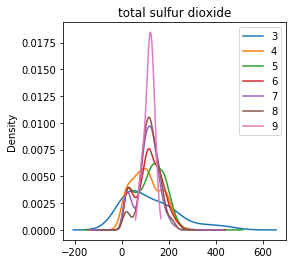

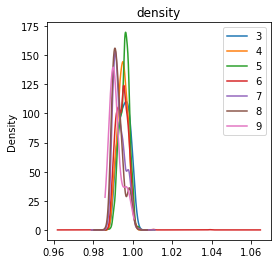

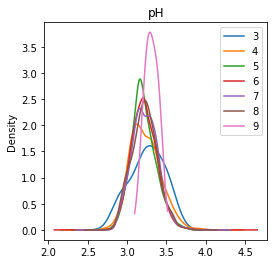

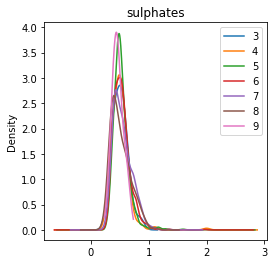

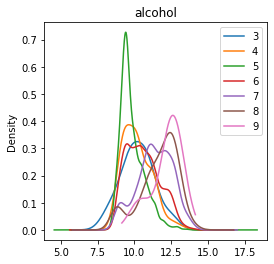

In [37]:
exibirHistogramaComKdeParaCadaVariavelComAgrupamento(variavelAlvo, dadosNumericos)

### Análise:
Exceto pela variável "alcohol", todas as demais possuem uma distribuição que se confunde quando feito o agrupamento e parecem não fornecer informações relevantes. A variável "density" parece poder fornecer informação mais relevante se ajustarmos a faixa dinâmica.

### Coeficientes de Correlação

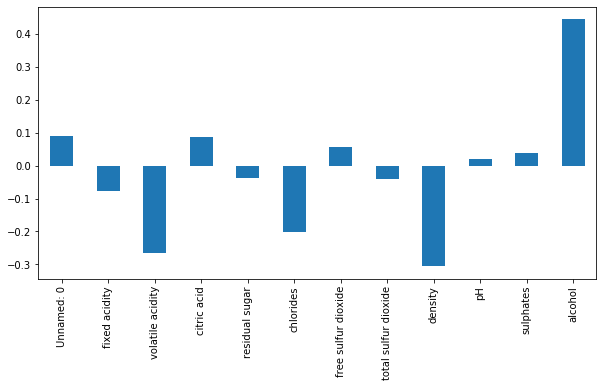

In [38]:
exibirGraficoCoeficientesDeCorrelacao(variavelAlvo, data)

#### Análise:
As variáveis abaixo são as que possuem maior correlação com a variável alvo:
* volatile acidity
* density
* alcohol

### Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e353310>,
      dtype=object)

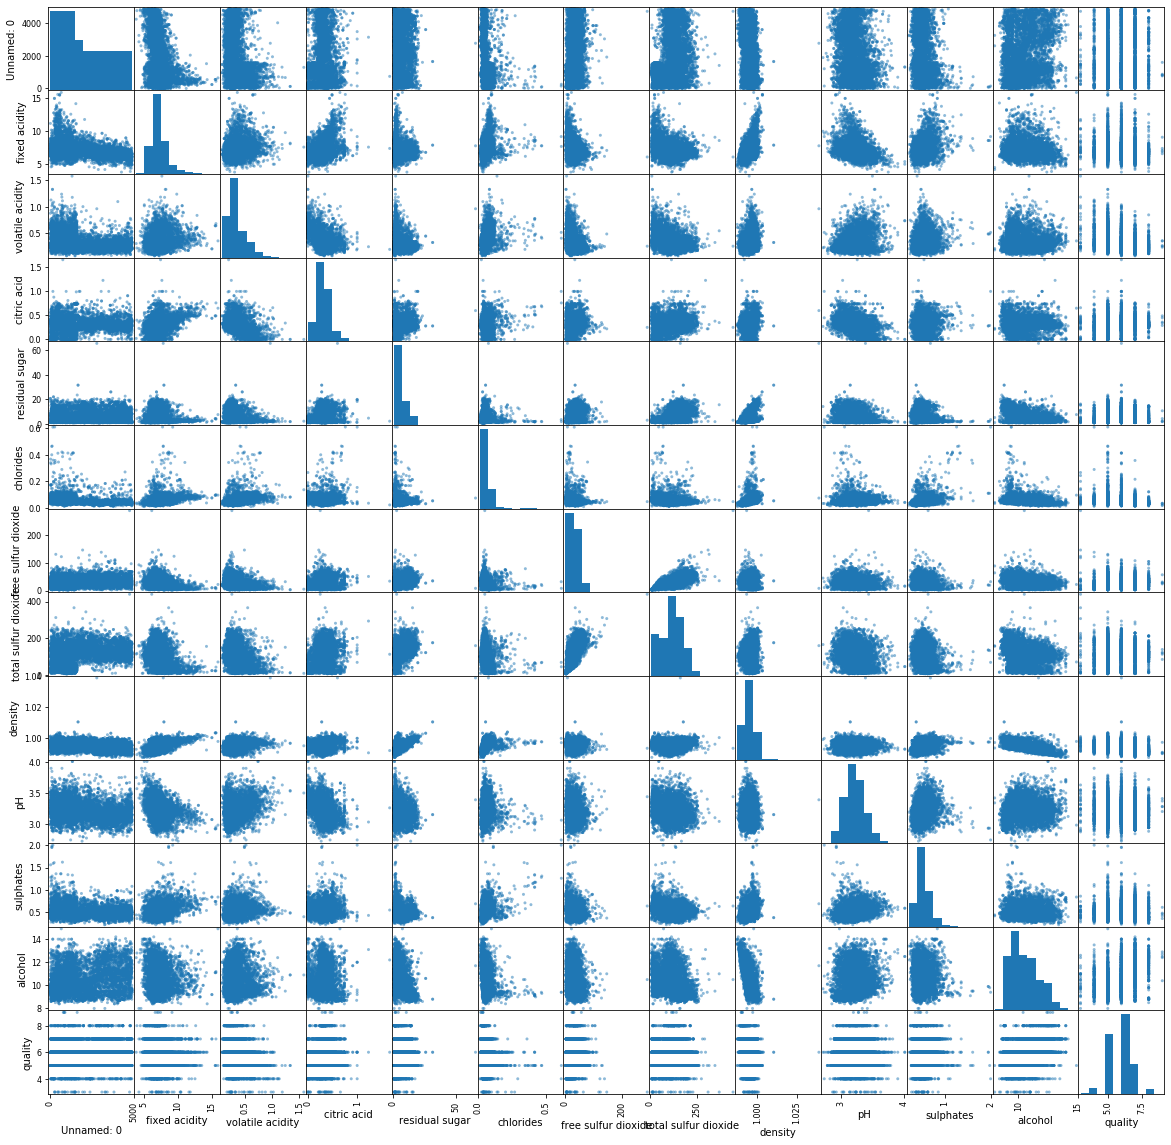

In [39]:
exibirScatterMatrix(data)

#### Análise:
Meu sonho é entender esse gráfico. Mas me parece que não há nenhum caso de correlação linear entre as variáveis que pudesse justificar a retirada de alguma delas.

### Analise de outlier por box-plot

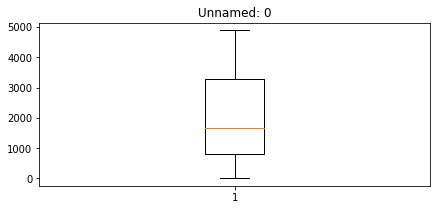

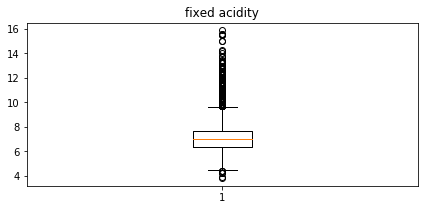

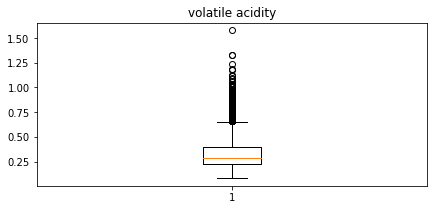

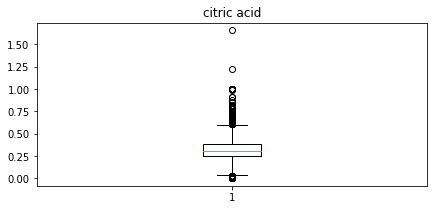

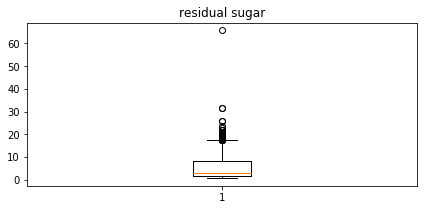

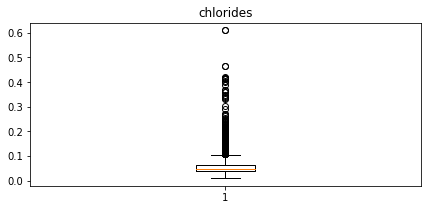

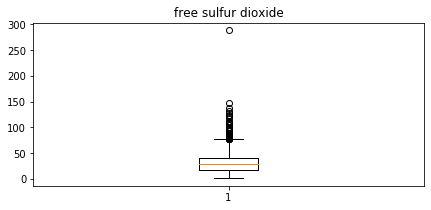

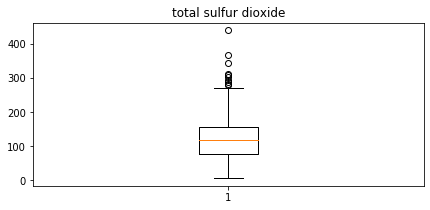

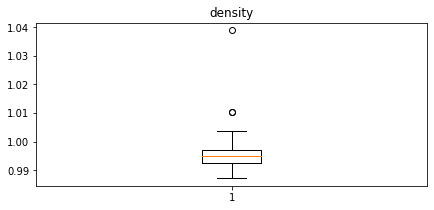

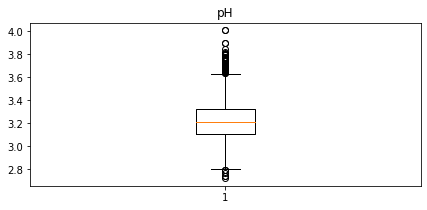

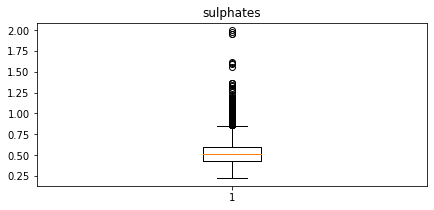

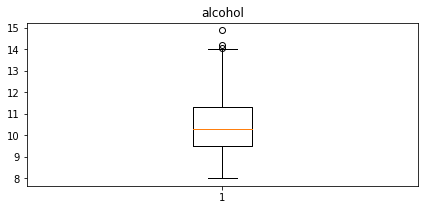

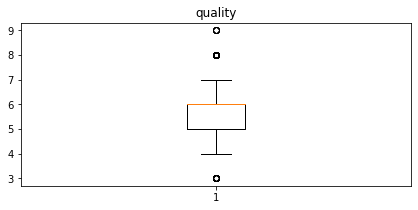

In [40]:
exibirBoxplotPorVariavel(dadosNumericos)

#### Análise:
Há outiliers em:
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide